In [1]:
import numpy as np
import cv2  
import matplotlib.pyplot as plt

In [2]:

def calculate_histogram(image):
   
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    hist = cv2.calcHist([grayscale], [0], None, [256], [0, 256])
   
    histogram = hist.flatten().tolist()
    
    return histogram

In [3]:
def histogram_to_image(histogram, image_size):
   
    
    total_pixels = image_size[0] * image_size[1]
    
    image = np.zeros(total_pixels, dtype=np.uint8)
    
    i = 0
    for intensity, pixel in enumerate(histogram):
        j = i+ int(pixel)
        image[i:j] = intensity
        i = j
    
    
    np.random.shuffle(image)
    
    image = image.reshape(image_size)
    
    return image

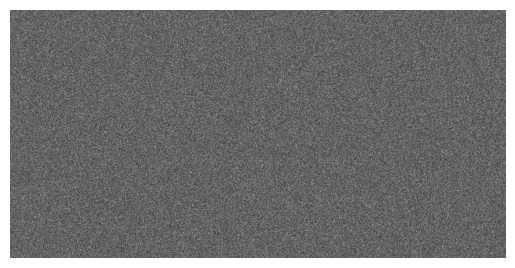

In [5]:

image = cv2.imread('image.jpg')
histogram = calculate_histogram(image)

image_size = image.shape[:2]

reconstructed_image = histogram_to_image(histogram, image_size)


cv2.imwrite('result.png', reconstructed_image)
plt.imshow(reconstructed_image, cmap="gray")
plt.axis("off")
plt.show()